## A Two-stage Feature Selection method for Text Categorization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
Corpus = pd.read_csv('/content/drive/MyDrive/ML_C_Proj/messages.csv')

In [3]:
Corpus.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, f1_score


#Import Seaborn
import seaborn as sns; 
sns.set()

#Import matplot library
import matplotlib.pyplot as plt

In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

#Step 1. Remove stop words, punctuation, and non-alphanumeric text.

In [6]:
# Step - a : Remove blank rows if any.
# Corpus = Corpus[:1000]
Corpus['message'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['message'] = [entry.lower() for entry in Corpus['message']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['message'] = [word_tokenize(entry) for entry in Corpus['message']]

In [7]:
print(Corpus['message'][1])

['lang', 'classification', 'grimes', ',', 'joseph', 'e', '.', 'and', 'barbara', 'f', '.', 'grimes', ';', 'ethnologue', 'language', 'family', 'index', ';', 'pb', '.', 'isbn', ':', '0-88312', '-', '708', '-', '3', ';', 'vi', ',', '116', 'pp', '.', ';', '$', '14', '.', '00', '.', 'summer', 'institute', 'of', 'linguistics', '.', 'this', 'companion', 'volume', 'to', 'ethnologue', ':', 'languages', 'of', 'the', 'world', ',', 'twelfth', 'edition', 'lists', 'language', 'families', 'of', 'the', 'world', 'with', 'sub-groups', 'shown', 'in', 'a', 'tree', 'arrangement', 'under', 'the', 'broadest', 'classification', 'of', 'language', 'family', '.', 'the', 'language', 'family', 'index', 'facilitates', 'locating', 'language', 'names', 'in', 'the', 'ethnologue', ',', 'making', 'the', 'data', 'there', 'more', 'accessible', '.', 'internet', ':', 'academic', '.', 'books', '@', 'sil', '.', 'org', 'languages', ',', 'reference', 'lang', '&', 'culture', 'gregerson', ',', 'marilyn', ';', 'ritual', ',', 'belie

In [8]:
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['message']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop wLoadingords and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final0'] = str(Final_words)
    

In [9]:
print(Corpus['text_final0'])

0       ['content', 'length', 'research', 'center', 'u...
1       ['lang', 'classification', 'grime', 'joseph', ...
2       ['post', 'inquiry', 'sergei', 'atamas', 'satam...
3       ['colleague', 'research', 'differ', 'degree', ...
4       ['earlier', 'morning', 'phone', 'friend', 'min...
                              ...                        
2888    ['hello', 'thanks', 'stop', 'take', 'many', 'n...
2889    ['list', 'owner', 'kiddin', 'invite', 'join', ...
2890    ['judge', 'return', 'post', 'must', 'sound', '...
2891    ['gotcha', 'two', 'separate', 'fallacy', 'argu...
2892    ['hello', 'work', 'thesis', 'concern', 'attitu...
Name: text_final0, Length: 2893, dtype: object


In [10]:
words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())
    
Corpus['text_final0'] = Corpus['text_final0'].apply(clean_sent)

print(Corpus['text_final0'])

0       [' content ', ' length ', ' research ', ' cent...
1       [' ', ' classification ', ' grime ', ' ', ' e ...
2       [' post ', ' inquiry ', ' ', ' ', ' ', ' ', ' ...
3       [' colleague ', ' research ', ' differ ', ' de...
4       [' ', ' morning ', ' phone ', ' friend ', ' mi...
                              ...                        
2888    [' hello ', ' thanks ', ' stop ', ' take ', ' ...
2889    [' list ', ' owner ', ' ', ' invite ', ' join ...
2890    [' judge ', ' return ', ' post ', ' must ', ' ...
2891    [' ', ' two ', ' separate ', ' fallacy ', ' ar...
2892    [' hello ', ' work ', ' thesis ', ' concern ',...
Name: text_final0, Length: 2893, dtype: object


#Splitting data into Training and Testing data


In [11]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final0'],Corpus['label'],test_size=0.3, random_state = 42)

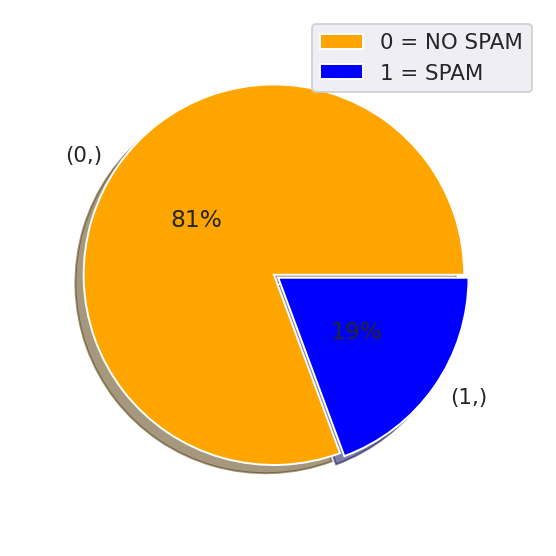

In [12]:
df = pd.DataFrame(Test_Y)
lb=df.value_counts().index.tolist()
val=df.value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

In [13]:
print(Corpus.shape)

print(Test_X)

(2893, 4)
1905    [' university ', ' ', ' institute ', ' applied...
1055    [' year ', ' ago ', ' wife ', ' adopt ', ' two...
2471    [' attention ', ' video ', ' sex ', ' lover ',...
1133    [' ', ' ', ' ', ' ', ' ', ' ist ', ' ', ' ', '...
1200    [' mind ', ' ', ' annual ', ' conference ', ' ...
                              ...                        
1507    [' program ', ' ', ' june ', ' coffee ', ' key...
2382    [' ', ' ', ' society ', ' promotion ', ' ', ' ...
2801    [' ', ' ', ' cite ', ' comment ', ' rober ', '...
654     [' want ', ' receive ', ' click ', ' following...
1993    [' call ', ' abstract ', ' move ', ' interpret...
Name: text_final0, Length: 868, dtype: object


# Step 2. Calculate the normalized TFIDF in the corresponding element of the weight matrix.
#Variables : max_features

In [14]:
# Tfidf_vect = TfidfVectorizer(max_features=15000) #Tfidfvectorizer makes
# X = Tfidf_vect.fit_transform(Corpus['text_final0'])
# Train_X_Tfidf = Tfidf_vect.transform(Train_X)   
# Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [15]:
Tfidf_vect = TfidfVectorizer(max_features=15000) #Tfidfvectorizer makes
X = Tfidf_vect.fit_transform(Corpus['text_final0'])
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,Corpus['label'],test_size=0.3, random_state = 42)

In [16]:
print(X.shape)
print(Train_X.shape)

(2893, 14461)
(2025, 14461)


# Step 3. Select the features according to the FCD method and get a new vector space model.

In [17]:
print(type(X))
import scipy
#iterate over x and find max value of a word
cx = scipy.sparse.coo_matrix(X)
# max_term = 0
# min_term = 100

a0 = {}
a1 = {}
for i,j,v in zip(cx.row, cx.col, cx.data):
    # print ("(%d, %d), %s" % (i,j,v))
    # max_term = max(max_term, j)
    # min_term = min(min_term,j)
    if Corpus['label'][i] == 0:
      if j in a0:
      # incerementing the count by 1
        a0[j] += 1
      else:
      # setting the count to 1
        a0[j] = 1
    else:
      if j in a1:
      # incerementing the count by 1
        a1[j] += 1
      else:
      # setting the count to 1
        a1[j] = 1

# print(max_term)
# print(min_term)

<class 'scipy.sparse.csr.csr_matrix'>


In [18]:
(l,m) = X.shape
fc = np.zeros(m)

for j in range(m):
  a0_j=0
  a1_j=0
  if j in a0:
    a0_j=a0[j]
  if j in a1:
    a1_j=a1[j]
  fc[j] = (a0_j - a1_j)/(a0_j + a1_j)
  print(j, fc[j])

Streaming output truncated to the last 5000 lines.
9461 1.0
9462 1.0
9463 -1.0
9464 1.0
9465 0.0
9466 1.0
9467 0.7777777777777778
9468 -1.0
9469 1.0
9470 1.0
9471 1.0
9472 1.0
9473 1.0
9474 1.0
9475 1.0
9476 -1.0
9477 0.0
9478 0.5400410677618069
9479 -1.0
9480 0.8
9481 1.0
9482 1.0
9483 0.6545454545454545
9484 0.3333333333333333
9485 0.3402061855670103
9486 1.0
9487 1.0
9488 -0.375
9489 -1.0
9490 1.0
9491 0.5
9492 0.7142857142857143
9493 1.0
9494 1.0
9495 1.0
9496 1.0
9497 0.0
9498 1.0
9499 0.9333333333333333
9500 -1.0
9501 -1.0
9502 1.0
9503 1.0
9504 1.0
9505 0.4716981132075472
9506 1.0
9507 -1.0
9508 -0.2631578947368421
9509 1.0
9510 1.0
9511 0.5
9512 1.0
9513 -1.0
9514 0.09090909090909091
9515 0.5578583765112263
9516 1.0
9517 0.1111111111111111
9518 0.0
9519 1.0
9520 1.0
9521 0.6666666666666666
9522 1.0
9523 1.0
9524 1.0
9525 1.0
9526 1.0
9527 1.0
9528 1.0
9529 0.3333333333333333
9530 1.0
9531 1.0
9532 1.0
9533 1.0
9534 1.0
9535 1.0
9536 1.0
9537 1.0
9538 1.0
9539 1.0
9540 1.0
9541 

In [19]:
count = 0
for i in range(m):
  if(fc[i] == 1.0 or fc[i] == -1.0):
    count = count + 1

print(count)

10129


# Step 4. Construct the new semantic space model by means of LSI. 
#Variables: n_components

In [21]:
import sklearn
from sklearn.decomposition import TruncatedSVD
SVD = sklearn.decomposition.TruncatedSVD(n_components=20, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
SVD.fit(X)
Train_X_SVD = SVD.transform(Train_X)
Test_X_SVD = SVD.transform(Test_X)

In [ ]:
# from sklearn.utils.extmath import randomized_svd

# U, Sigma, VT = randomized_svd(Train_X_Tfidf, 
#                               n_components=15,
#                               n_iter=5,
#                               random_state=None)
# Train_X_SVD = U

In [22]:
print(Train_X_SVD.shape)
print(Test_X_SVD.shape)

(2025, 20)
(868, 20)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# vectorizer = TfidfVectorizer(max_df=0.5, stop_words='english', use_idf=True)
# lsa = TruncatedSVD(n_components=20)
# Tfidf_vect.fit(Corpus['text_final0'])

# train_text = vectorizer.fit_transform(Train_X)
# test_text = vectorizer.fit_transform(Test_X)

# train_text = lsa.fit_transform(train_text)
# test_text = lsa.fit_transform(test_text)


# clf = RandomForestClassifier(max_depth=20, random_state=0)
# clf.fit(train_text, Train_Y)
# clf.score(test_text,Test_Y)

#Step 5. Use the SVM classifier on the semantic space model.

#5.1 RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(Train_X_SVD, Train_Y)
clf.score(Test_X_SVD,Test_Y)

0.9873271889400922

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(Train_X, Train_Y)
clf.score(Test_X,Test_Y)

0.9412442396313364

# 5.2 SVM

In [27]:
from sklearn import svm
clf = svm.SVC()
clf.fit(Train_X_SVD, Train_Y)
clf.score(Test_X_SVD,Test_Y)

0.9965437788018433

In [28]:
from sklearn import svm
clf = svm.SVC()
clf.fit(Train_X, Train_Y)
clf.score(Test_X,Test_Y)

0.9758064516129032

# Step 6. Obtain the categorization performance over the data set.